In [1]:
import pandas as pd
import numpy as np
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader
from tqdm import tqdm
import matplotlib.pyplot as plt

In [2]:
# Définir la taille du batch
batch_size = 4

# Définir les transformations à appliquer aux images
transform = transforms.Compose(
    [transforms.Resize((128, 128)),
     transforms.ToTensor(),
     transforms.Normalize((0.5,), (0.5,))])

# Charger les données d'entrainement
trainset = torchvision.datasets.ImageFolder(root='./data/train', transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)

# Charger les données de test

testset = torchvision.datasets.ImageFolder(root='./data/test', transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=2)

# Définir les classes
classes = ('n01443537', 'n01484850', 'n01537544', 'n01614925', 'n02114367', 'n02133161')

In [3]:
input_size = 3 * 128 * 128
output_size = len(classes)
learning_rate = 0.001
batch_size = 10
num_epochs = 20

In [4]:
class NN(nn.Module):
    def __init__(self, input_size, output_size):
        super(NN, self).__init__()
        self.fc1 = nn.Linear(input_size, input_size // 10)
        self.fc2 = nn.Linear(input_size // 10, input_size // 100)
        self.fc3 = nn.Linear(input_size // 100, input_size // 1000)
        self.fc4 = nn.Linear(input_size // 1000, output_size)
    
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        x = self.fc3(x)
        x = self.fc4(x)
        return x

In [5]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [6]:
train_loader = DataLoader(dataset=trainset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=testset, batch_size=batch_size, shuffle=True)

In [7]:
model = NN(input_size, output_size).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [8]:
def check_accuracy(loader, model):
    num_correct = 0
    num_samples = 0
    model.eval()

    with torch.no_grad():
        for x, y in loader:
            x = x.to(device=device)
            y = y.to(device=device)
            x = x.reshape(x.shape[0], -1)

            scores = model(x)
            _, predictions = scores.max(1)
            num_correct += (predictions == y).sum()
            num_samples += predictions.size(0)

        print(f'{num_correct} / {num_samples}: {float(num_correct)/float(num_samples)*100:.2f}%')

    model.train()
    return float(num_correct)/float(num_samples)*100

In [9]:
precision = []

for epoch in range(num_epochs):
    for batch_idx, (data, targets) in enumerate(tqdm(train_loader)):
        # get data to cuda if possible
        data = data.to(device=device)
        targets = targets.to(device=device)

        # get to correct shape
        data = data.reshape(data.shape[0], -1)

        # forward
        scores = model(data)
        loss = criterion(scores, targets)
        
        # backward
        optimizer.zero_grad()
        loss.backward()

        # gradient descent or adam step
        optimizer.step()
    precision.append(check_accuracy(train_loader, model))


100%|██████████| 647/647 [00:45<00:00, 14.26it/s]


3216 / 6468: 49.72%


100%|██████████| 647/647 [00:43<00:00, 14.98it/s]


4245 / 6468: 65.63%


100%|██████████| 647/647 [00:40<00:00, 16.11it/s]


4675 / 6468: 72.28%


100%|██████████| 647/647 [00:38<00:00, 16.79it/s]


4824 / 6468: 74.58%


100%|██████████| 647/647 [00:38<00:00, 16.82it/s]


4617 / 6468: 71.38%


100%|██████████| 647/647 [00:37<00:00, 17.10it/s]


4880 / 6468: 75.45%


100%|██████████| 647/647 [00:37<00:00, 17.10it/s]


5127 / 6468: 79.27%


100%|██████████| 647/647 [00:37<00:00, 17.10it/s]


2513 / 6468: 38.85%


100%|██████████| 647/647 [00:37<00:00, 17.10it/s]


4807 / 6468: 74.32%


100%|██████████| 647/647 [00:37<00:00, 17.10it/s]


4913 / 6468: 75.96%


100%|██████████| 647/647 [00:37<00:00, 17.10it/s]


5318 / 6468: 82.22%


100%|██████████| 647/647 [00:37<00:00, 17.10it/s]


5270 / 6468: 81.48%


100%|██████████| 647/647 [00:37<00:00, 17.09it/s]


5331 / 6468: 82.42%


100%|██████████| 647/647 [00:37<00:00, 17.08it/s]


5344 / 6468: 82.62%


100%|██████████| 647/647 [00:37<00:00, 17.10it/s]


4468 / 6468: 69.08%


100%|██████████| 647/647 [00:37<00:00, 17.10it/s]


5327 / 6468: 82.36%


100%|██████████| 647/647 [00:42<00:00, 15.40it/s]


5617 / 6468: 86.84%


100%|██████████| 647/647 [00:43<00:00, 15.02it/s]


5316 / 6468: 82.19%


100%|██████████| 647/647 [00:42<00:00, 15.27it/s]


5241 / 6468: 81.03%


100%|██████████| 647/647 [00:42<00:00, 15.09it/s]


5514 / 6468: 85.25%


In [10]:
check_accuracy(train_loader, model)
check_accuracy(test_loader, model)

5514 / 6468: 85.25%
492 / 726: 67.77%


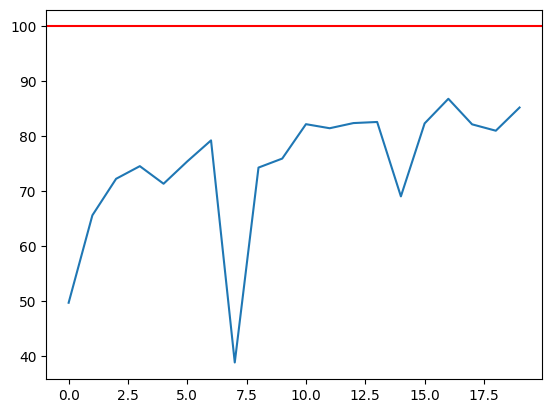

In [12]:
plt.plot([49.72, 65.63, 72.28, 74.58, 71.38, 75.45, 79.27, 38.85, 74.32, 75.96, 82.22, 81.48, 82.42, 82.62, 69.08, 82.36, 86.84, 82.19, 81.03, 85.25])
plt.axhline(y=100, color="r")
plt.show()